# Institutional PitchBook Correlations

In [1]:
import leavenworth as lc
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [2]:
params = lc.set_params('leavenworth')

In [3]:
btc = lc.glassnode('PRICE')

In [4]:
tickers = ['^GSPC', '^IXIC', '^RUT', 'EAF', 'EEM','DX-Y.NYB', 'EURUSD=X', 'JPY=X', 'GBPUSD=X', 'EMB', 'CL=F', 'GC=F', 'SI=F', 'AGG', '^FNER']
tickers = ['^GSPC', '^IXIC', '^RUT', 'DX-Y.NYB', 'EURUSD=X', 'JPY=X', 'GBPUSD=X', 'CL=F', 'GC=F', 'SI=F', 'AGG', 'EEM', 'EMB', '^FNER']
#tickers = ['EEM', 'EMB' ]
period = '10y'

In [5]:
data = lc.yahoo(tickers, period = period).dropna()

C:\Users\rgrover1\lc\leavenworth\yahoo.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  price = price.append(h)
C:\Users\rgrover1\lc\leavenworth\yahoo.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  price = price.append(h)
C:\Users\rgrover1\lc\leavenworth\yahoo.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  price = price.append(h)
C:\Users\rgrover1\lc\leavenworth\yahoo.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  price = price.append(h)
C:\Users\rgrover1\lc\leavenworth\yahoo.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [6]:
data = data.rename_column('CL=F', 'CRUDE_OIL').rename_column('^FNER', 'REITS').rename_column('DX-Y.NYB', 'DXY').rename_column('EURUSD=X', 'EURUSD').rename_column('GBPUSD=X', 'GBPUSD').rename_column('JPY=X', 'JPYUSD').rename_column('GC=F', 'GOLD').rename_column('SI=F', 'SILVER').rename_column('^GSPC', 'S&P500').rename_column('^IXIC', 'NASDAQ').rename_column('^RUT', 'RUSSEL_2000')

In [7]:
data['BTCUSD'] = btc

In [8]:
data = data[['CRUDE_OIL', 'GOLD', 'SILVER', 'DXY', 'EURUSD', 'GBPUSD', 'JPYUSD', 'AGG', 'EEM', 'EMB', 'REITS', 'S&P500', 'RUSSEL_2000', 'NASDAQ', 'BTCUSD']]

In [9]:
dr = lc.daily_returns(data, period = 5, method = 'mean', percent = False).dropna()

# Correlations

In [10]:
ts = dr.shape[1]

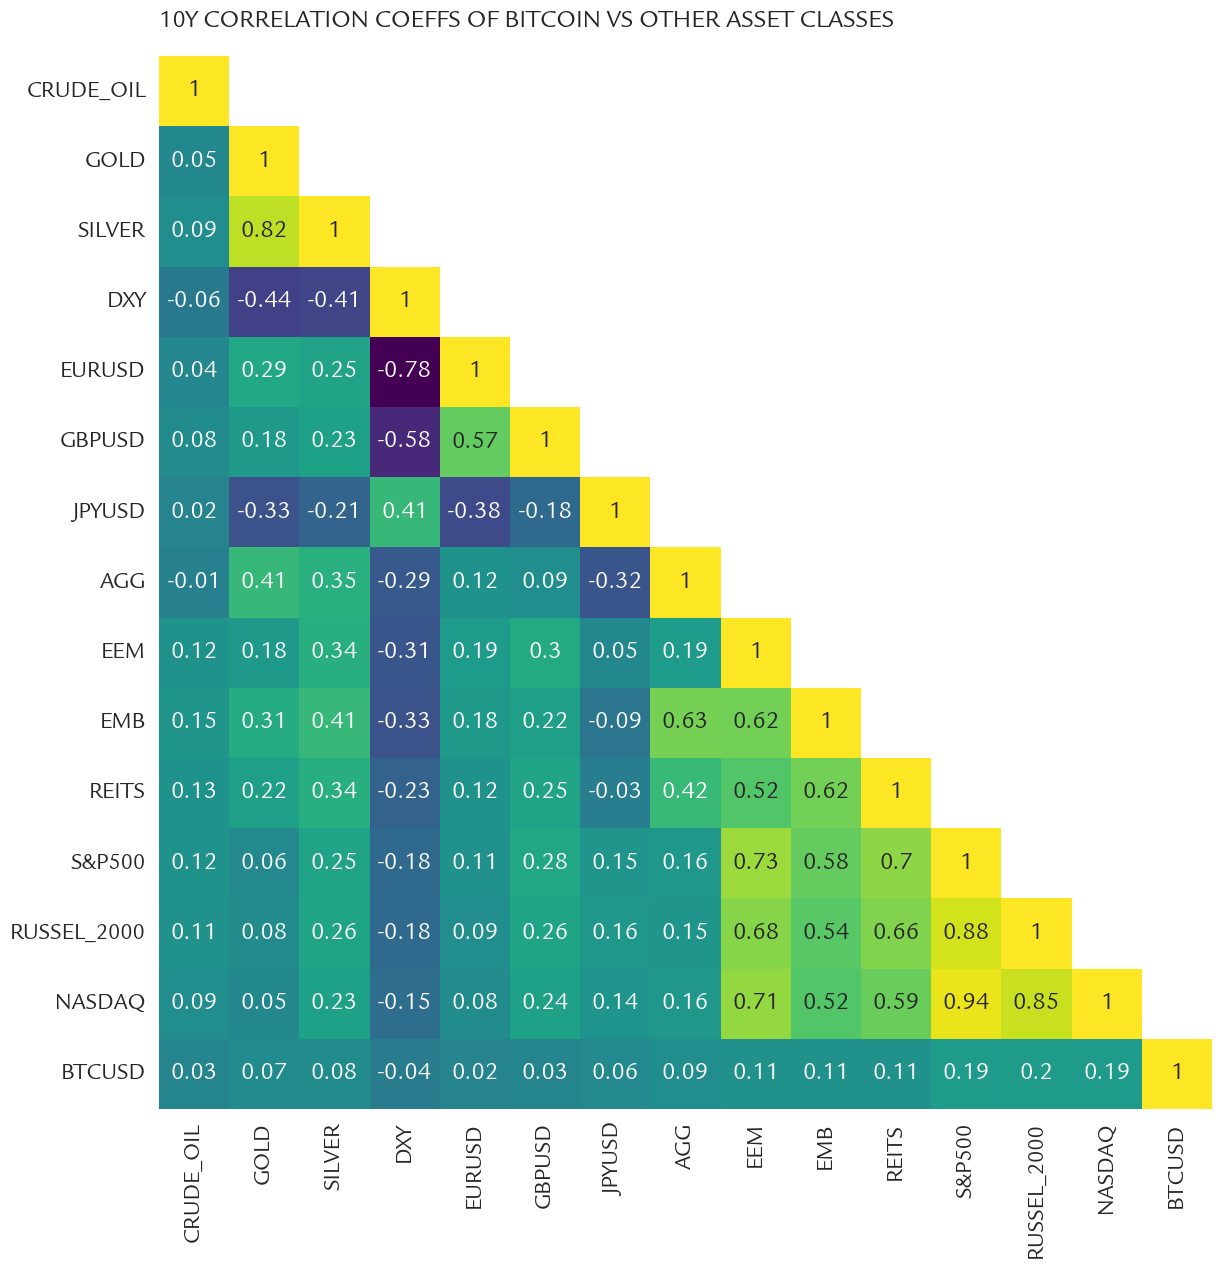

In [11]:
corr = dr.dropna().corr(method = 'pearson').round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
for i in range(ts):
    mask[i][i] = 0
f, ax = plt.subplots(figsize=(13, 13))
ax = sns.heatmap(corr, mask=mask, vmax=1, annot = True, cmap = 'viridis', square=True, cbar = False)
lc.whiten_grid(f, ax)
plt.title('10Y Correlation coeffs of Bitcoin vs other asset classes'.upper(), loc = 'left', y = 1.02);

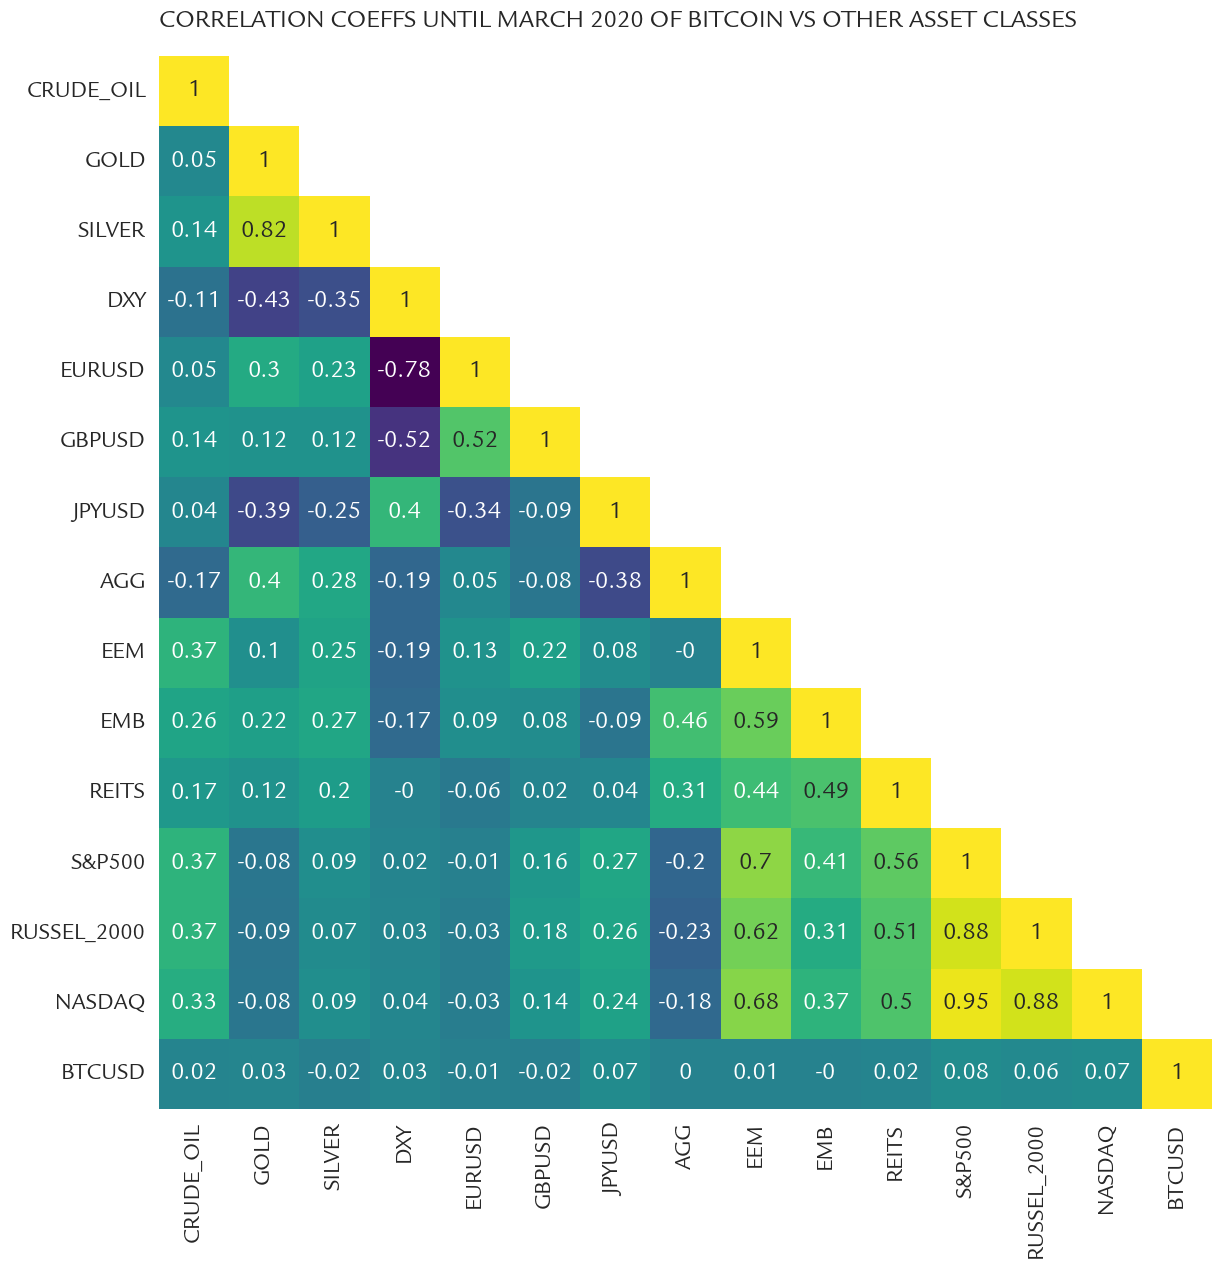

In [12]:
corr = dr[:'2020-02-29'].corr(method = 'pearson').round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
for i in range(ts):
    mask[i][i] = 0
f, ax = plt.subplots(figsize=(13, 13))
ax = sns.heatmap(corr, mask=mask, vmax=1, annot = True, cmap = 'viridis', square=True, cbar = False)
lc.whiten_grid(f, ax)
plt.title('Correlation coeffs until March 2020 of Bitcoin vs other asset classes'.upper(), loc = 'left', y = 1.02);

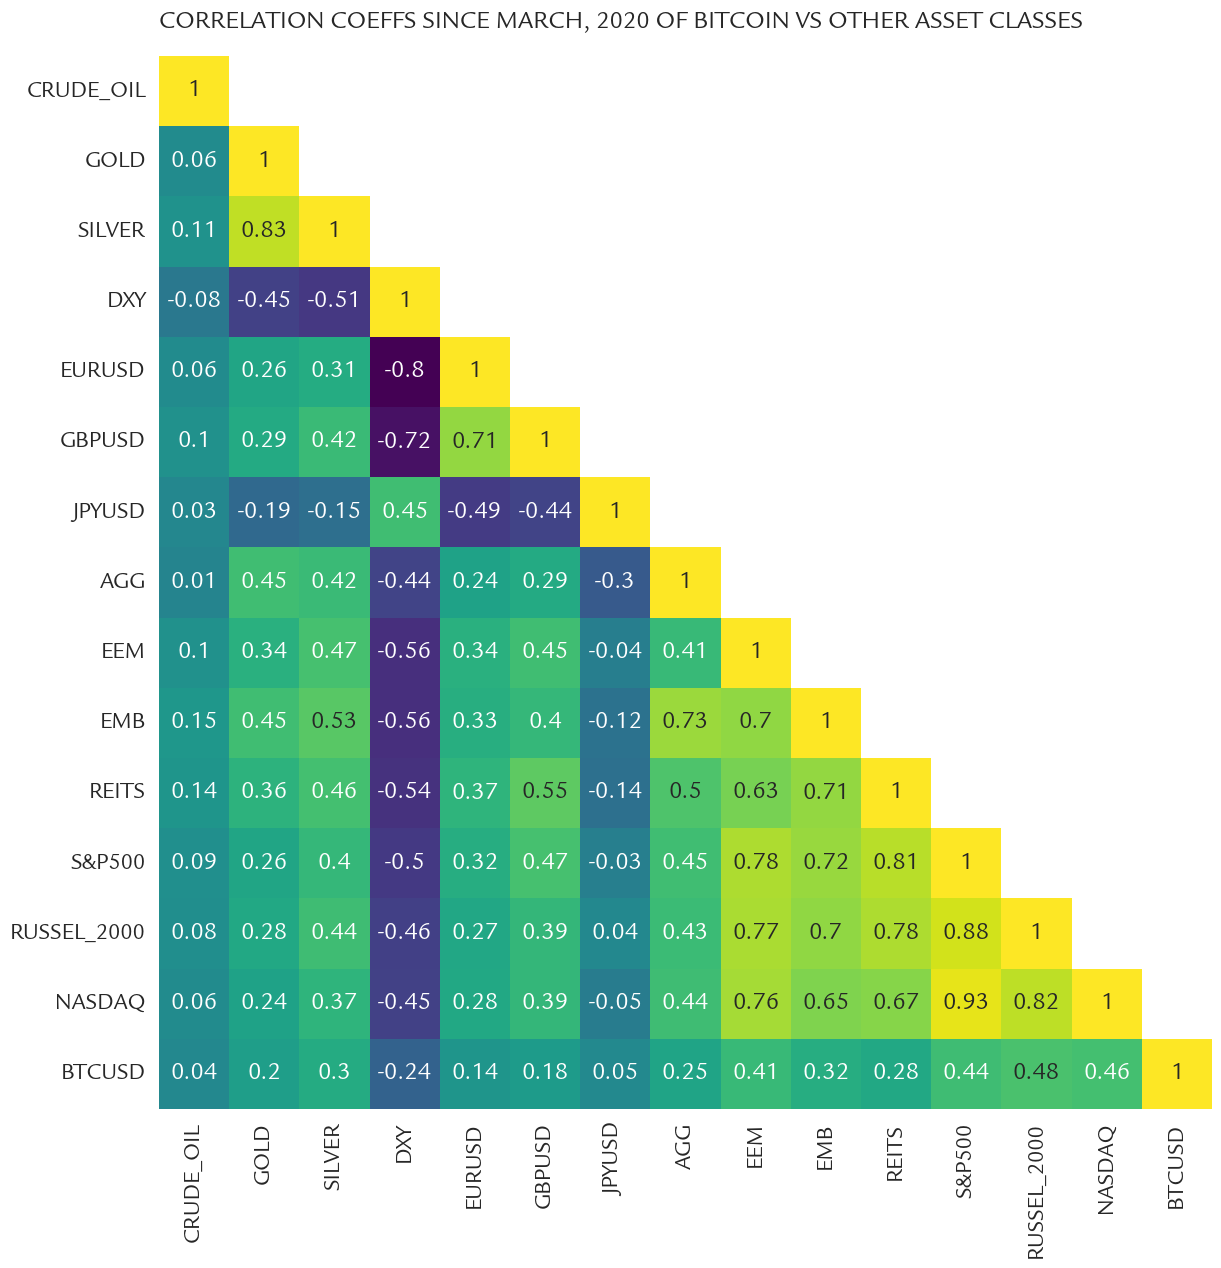

In [13]:
corr = dr['2020-03-01':].dropna().corr(method='pearson').round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
for i in range(ts):
    mask[i][i] = 0
f, ax = plt.subplots(figsize=(13, 13))
ax = sns.heatmap(corr, mask=mask, vmax=1, annot = True, cmap = 'viridis', square=True, cbar = False)
lc.whiten_grid(f, ax)
plt.title('Correlation coeffs since March, 2020 of Bitcoin vs other asset classes'.upper(), loc = 'left', y = 1.02);

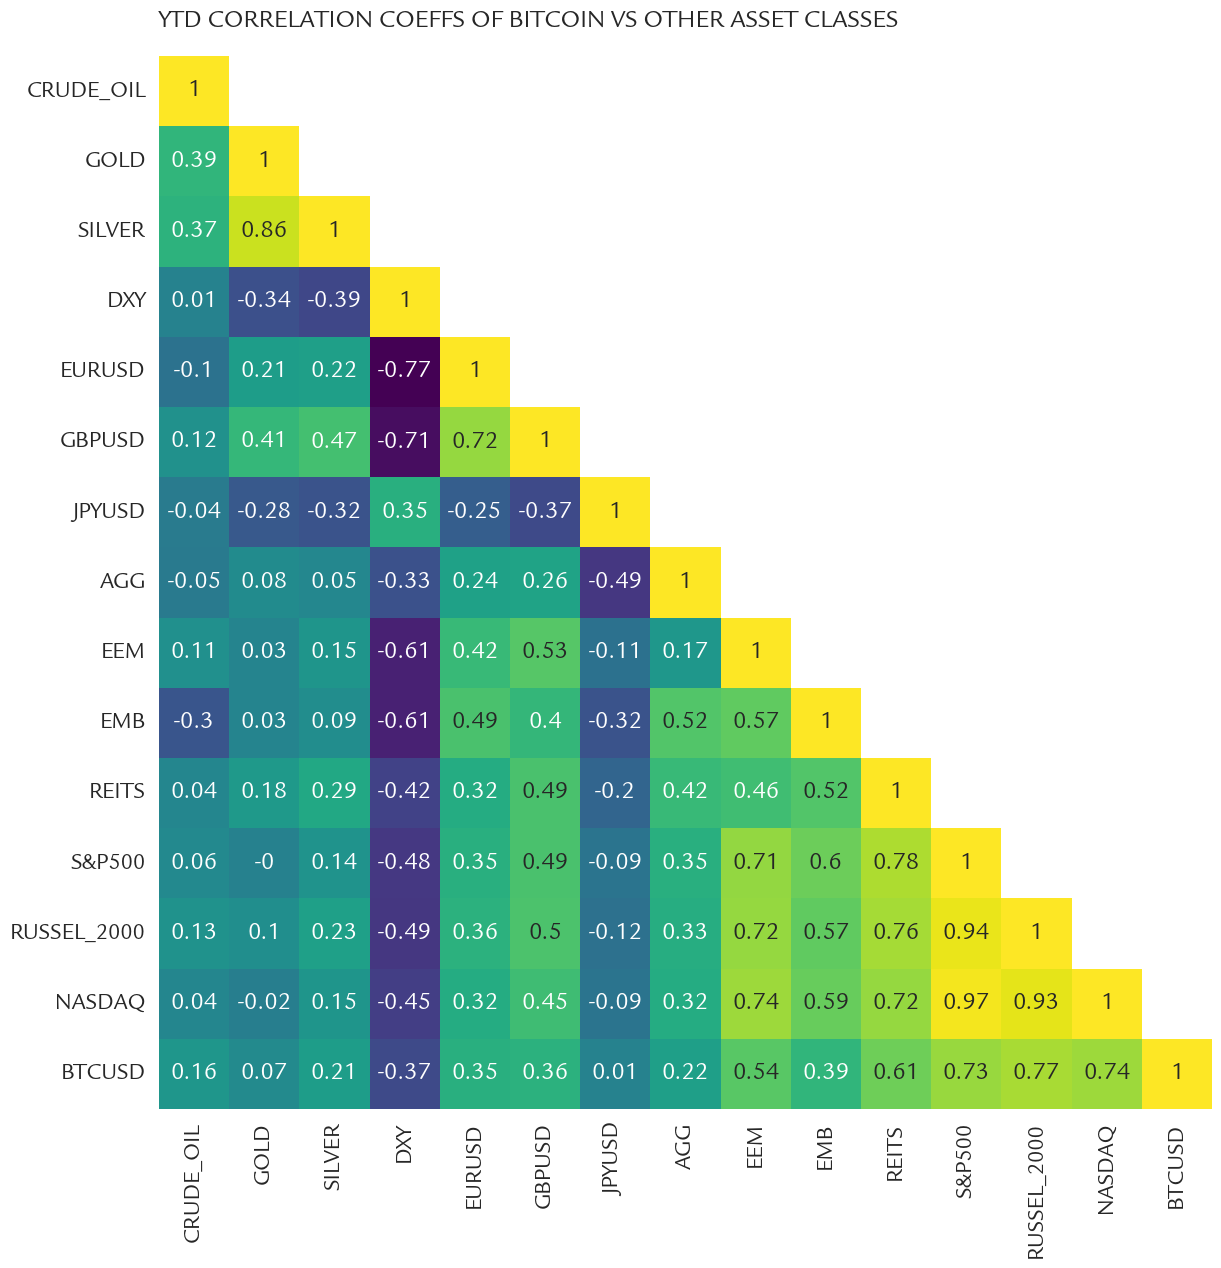

In [14]:
corr = dr['2022-01-01':].dropna().corr(method='pearson').round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
for i in range(ts):
    mask[i][i] = 0
f, ax = plt.subplots(figsize=(13, 13))
ax = sns.heatmap(corr, mask=mask, vmax=1, annot = True, cmap = 'viridis', square=True, cbar = False)
lc.whiten_grid(f, ax)
plt.title('YTD Correlation coeffs of Bitcoin vs other asset classes'.upper(), loc = 'left', y = 1.02);

In [15]:
d = lc.daily_returns(data[['DXY', 'EURUSD']], period = 1, method = 'mean', percent = False).dropna()

In [16]:
d['DXY+'] =1/d.DXY

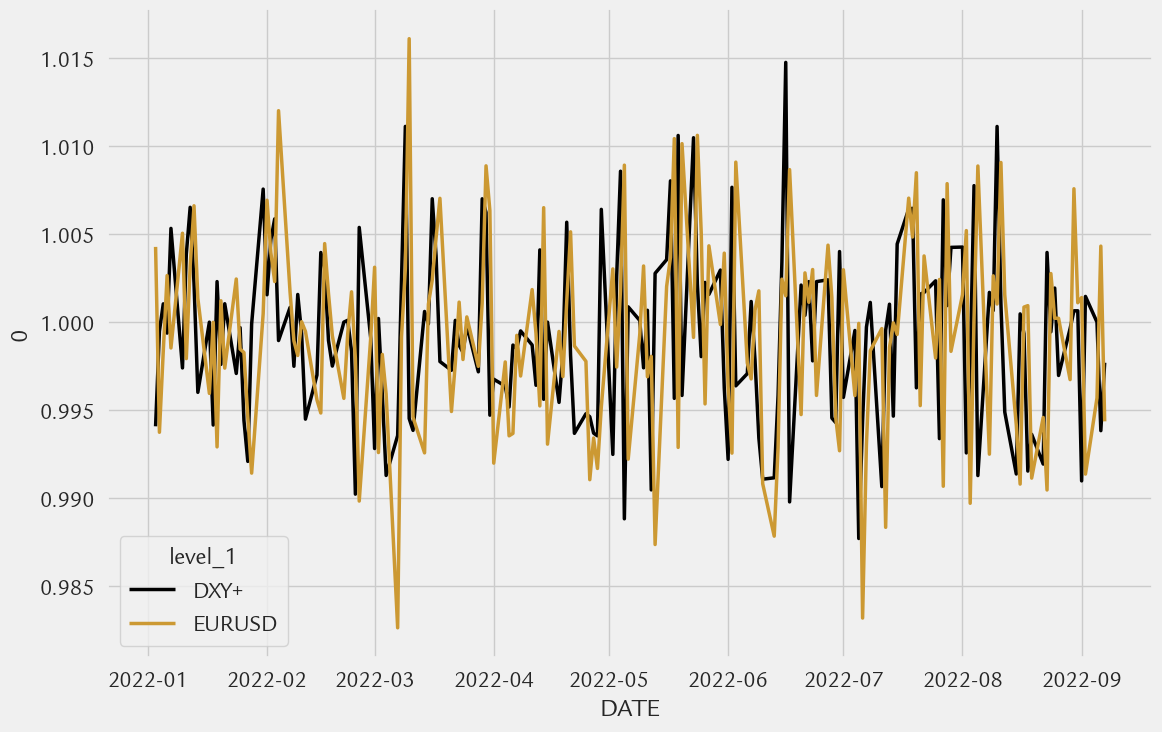

In [17]:
f, ax = plt.subplots(figsize = (12,8))
ax = sns.lineplot(data = d.loc['2022-01-01':][['DXY+', 'EURUSD']].stack().reset_index(), x = 'DATE', y = 0, hue = 'level_1')

In [18]:
d.loc['2022-01-01':].corr()

,DXY,EURUSD,DXY+
DXY,1.000000,-0.012025,-0.999977
EURUSD,-0.012025,1.000000,0.012323
DXY+,-0.999977,0.012323,1.000000


In [19]:
d.loc['2022-01-01':]-1

,DXY,EURUSD,DXY+
DATE,,,
2022-01-03,0.005958,0.004276,-0.005923
2022-01-04,0.000520,-0.006261,-0.000519
2022-01-05,-0.001039,-0.001647,0.001040
2022-01-06,0.000624,0.002647,-0.000623
2022-01-07,-0.005299,-0.001469,0.005327
...,...,...,...
2022-09-01,0.009108,0.001395,-0.009025
2022-09-02,-0.001459,-0.008639,0.001461
2022-09-05,0.000000,-0.004311,0.000000


<AxesSubplot:xlabel='DXY', ylabel='EURUSD'>

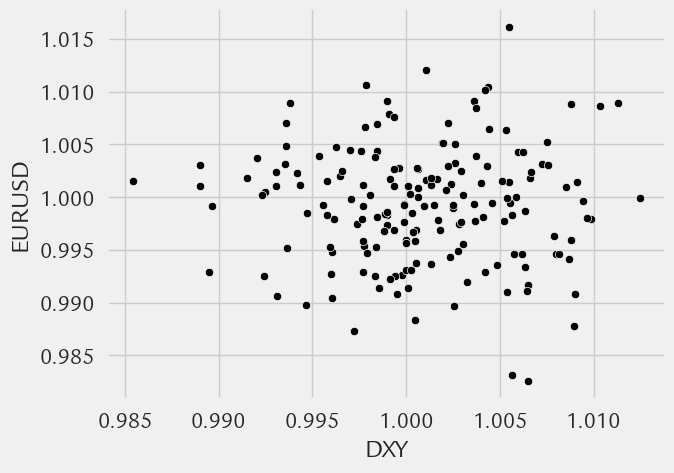

In [20]:
sns.scatterplot(data = d.loc['2022-01-01':], x = 'DXY', y = 'EURUSD')

In [21]:
d = lc.daily_returns(data[['DXY', 'EURUSD']], period = 365, method = 'mean', percent = False).dropna()

<AxesSubplot:xlabel='DXY', ylabel='EURUSD'>

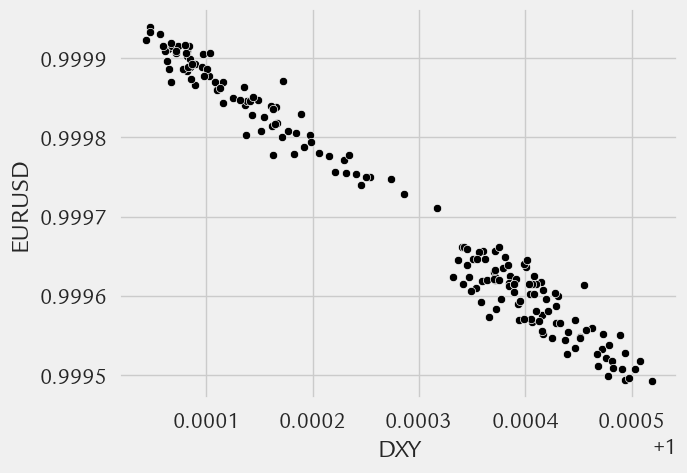

In [22]:
sns.scatterplot(data = d.loc['2022-01-01':], x = 'DXY', y = 'EURUSD')

<AxesSubplot:xlabel='DATE', ylabel='DXY'>

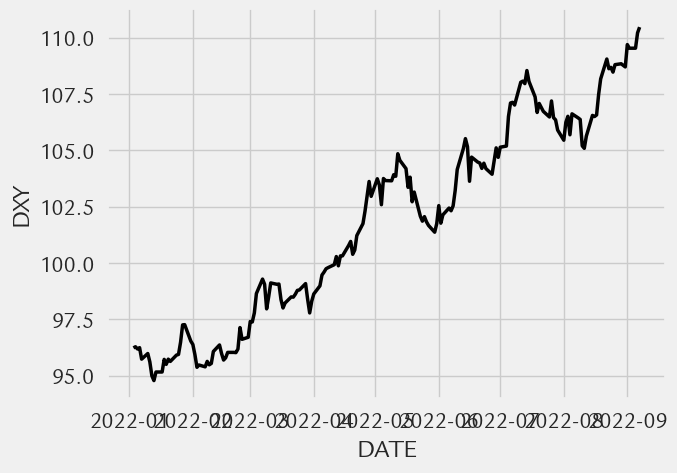

In [23]:
sns.lineplot(data = data.query('DATE > "2022-01-01"'), y = 'DXY', x = 'DATE')

<AxesSubplot:xlabel='DATE', ylabel='EURUSD'>

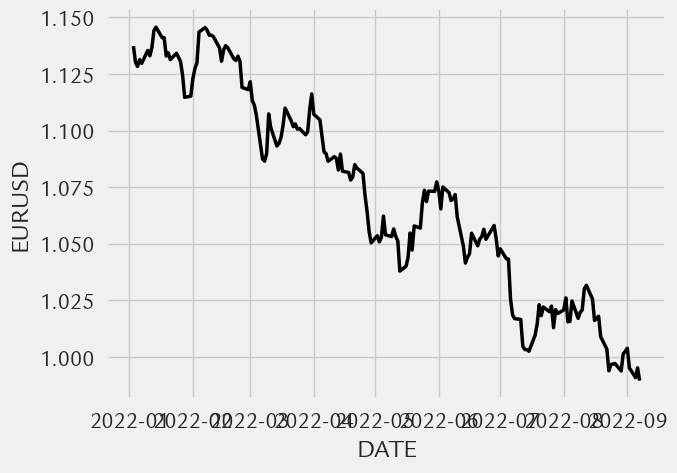

In [24]:
sns.lineplot(data = data.query('DATE > "2022-01-01"'), y = 'EURUSD', x = 'DATE')